In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
url = 'https://raw.githubusercontent.com/marcosemn/Dados_Aluguel_BH/main/Dados-Aluguel-BH-carlos-prates_Manipulacao.csv'
dados = pd.read_csv(url,encoding='latin')
dados.head()

,area (m²),número de quartos,aluguel,street,neighborhood,city,state
0,3100.0,-1.0,165000.0,NaN,Carlos Prates,Belo Horizonte,Minas Gerais
1,1800.0,-1.0,35000.0,NaN,Carlos Prates,Belo Horizonte,Minas Gerais
2,1100.0,-1.0,24000.0,Avenida Dom Pedro Ii,Carlos Prates,Belo Horizonte,Minas Gerais
3,1300.0,-1.0,13000.0,Avenida Nossa Senhora De Fátima,Carlos Prates,Belo Horizonte,Minas Gerais
4,800.0,-1.0,6500.0,NaN,Carlos Prates,Belo Horizonte,Minas Gerais


In [9]:
dados.street.value_counts().head()

Avenida Nossa Senhora De Fátima    81
Rua Bagé                           12
Avenida Dom Pedro Ii                9
Rua Entre Rios                      5
Rua Rio Pomba                       2
Name: street, dtype: int64

In [10]:
dados.street.value_counts(normalize=True).head()

Avenida Nossa Senhora De Fátima    0.698276
Rua Bagé                           0.103448
Avenida Dom Pedro Ii               0.077586
Rua Entre Rios                     0.043103
Rua Rio Pomba                      0.017241
Name: street, dtype: float64

Text(0, 0.5, 'Aluguel')

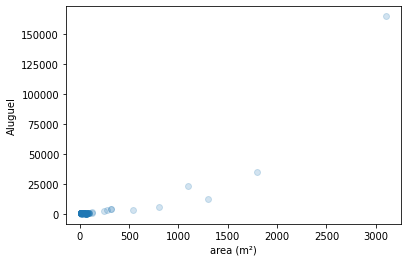

In [31]:
plt.scatter(dados['area (m²)'], dados['aluguel'], alpha=0.2)
plt.xlabel('area (m²)')
plt.ylabel('Aluguel')

Text(0, 0.5, 'Aluguel')

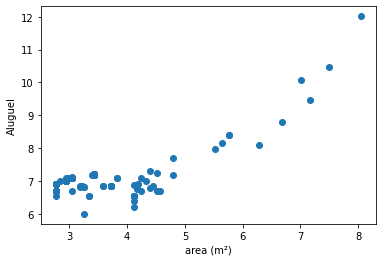

In [32]:
plt.scatter(np.log1p(dados['area (m²)']), np.log1p(dados['aluguel']))
plt.xlabel('area (m²)')
plt.ylabel('Aluguel')

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dados, test_size=0.2, random_state=42)

In [12]:
X_cols = ['area (m²)', 'número de quartos']
X_train, X_test = train[X_cols], test[X_cols]
y_train, y_test = train['aluguel'], test['aluguel']

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area (m²)          133 non-null    float64
 1   número de quartos  133 non-null    float64
 2   aluguel            133 non-null    float64
 3   street             116 non-null    object 
 4   neighborhood       133 non-null    object 
 5   city               133 non-null    object 
 6   state              133 non-null    object 
dtypes: float64(3), object(4)
memory usage: 7.4+ KB


In [14]:
X_train=X_train.fillna(X_train.median())
X_test=X_test.fillna(X_train.median())

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8588858704524206

In [16]:
import numpy as np
X_train['area (m²)']=X_train['area (m²)'].apply(np.log1p)
X_test['area (m²)']=X_test['area (m²)'].apply(np.log1p)

In [18]:
y_train = y_train.apply(np.log1p)
y_test = y_test.apply(np.log1p)

In [19]:
#Usando Random Forest
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)  

0.5499261513251289

In [20]:
#Usando KNN
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.8574840205325037

In [21]:
#Usando OLS
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.3553081077102339

In [22]:
reg.coef_

array([ 0.55640596, -0.15459556])

In [23]:
reg.intercept_

5.254971490365197

In [25]:
#  2 quartos, 49m2
reg.predict([[49, 2]])

array([32.2096724])

In [26]:
#Usando Árvore de decisão
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.24038212913509396

[Text(643.8461538461538, 951.3000000000001, 'area (m²) <= 6.644\nmse = 0.618\nsamples = 106\nvalue = 7.088'),
 Text(343.38461538461536, 679.5, 'area (m²) <= 5.161\nmse = 0.13\nsamples = 102\nvalue = 6.953'),
 Text(171.69230769230768, 407.70000000000005, 'area (m²) <= 3.97\nmse = 0.05\nsamples = 97\nvalue = 6.889'),
 Text(85.84615384615384, 135.89999999999998, 'mse = 0.04\nsamples = 79\nvalue = 6.929'),
 Text(257.53846153846155, 135.89999999999998, 'mse = 0.054\nsamples = 18\nvalue = 6.71'),
 Text(515.0769230769231, 407.70000000000005, 'número de quartos <= 3.5\nmse = 0.03\nsamples = 5\nvalue = 8.212'),
 Text(429.23076923076917, 135.89999999999998, 'mse = 0.006\nsamples = 3\nvalue = 8.079'),
 Text(600.9230769230769, 135.89999999999998, 'mse = 0.0\nsamples = 2\nvalue = 8.412'),
 Text(944.3076923076923, 679.5, 'area (m²) <= 7.768\nmse = 0.88\nsamples = 4\nvalue = 10.509'),
 Text(858.4615384615383, 407.70000000000005, 'area (m²) <= 7.333\nmse = 0.167\nsamples = 3\nvalue = 10.007'),
 Text(7

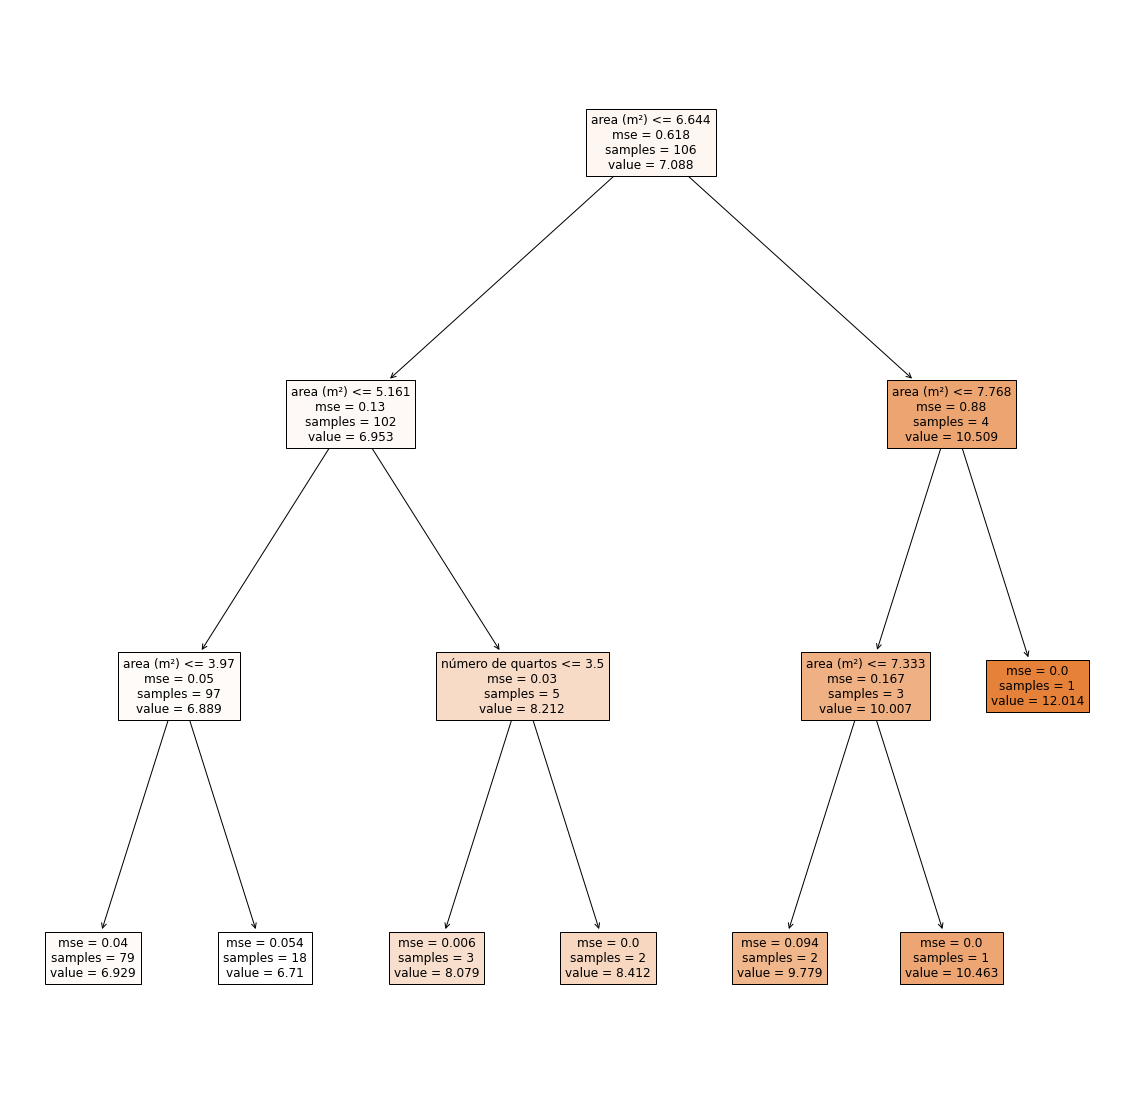

In [30]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt, filled=True, feature_names=X_test.columns)